In [1]:
import pandas as pd
from sklearn import datasets
 
dataset = datasets.load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
from sklearn.model_selection import train_test_split
 
# Define independent (features) and dependent (targets) variables
X = dataset['data']
y = dataset['target']
 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
 
# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [4]:
knn.score(X_test, y_test)

0.9254385964912281

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
knn.score(X_test, y_test)


[[ 75  10]
 [  7 136]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        85
           1       0.93      0.95      0.94       143

    accuracy                           0.93       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



0.9254385964912281

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=15)
tree = DT.fit(X, y)
DT.score(X, y)

conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
knn.score(X_test, y_test)



              precision    recall  f1-score   support

           0       0.91      0.88      0.90        85
           1       0.93      0.95      0.94       143

    accuracy                           0.93       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



0.9254385964912281

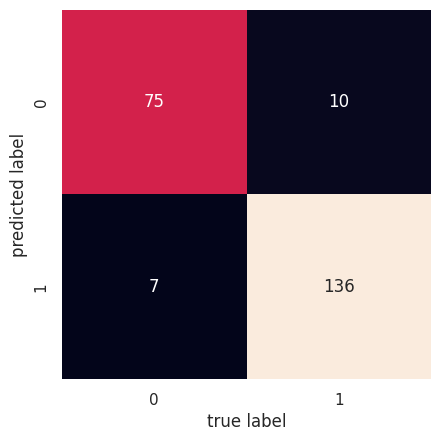

In [7]:
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt

sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [16]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=5, gamma=0.05)
model.fit(X, y)
model.score(X, y)

0.9866666666666667

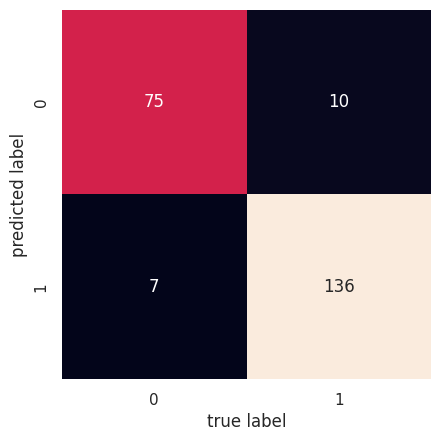

In [17]:
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [18]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# Define independent (features) and dependent (targets) variables
X = dataset['data']
y = dataset['target']
 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCA_find(X):
    for i in range(1, 4):
        pca = PCA(n_components = i)
        X_new = pca.fit_transform(X)
        cumulative_variance = sum(pca.explained_variance_ratio_)
        if cumulative_variance >= 0.95:
            return i
        
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_components = PCA_find(X)

print(num_components)

2


In [24]:
pca = PCA(n_components=num_components)
X_new = pca.fit_transform(X)
X_new = pca.transform(X)

In [31]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=42, algorithm='elkan')
clusters = kmeans.fit_predict(X_new)
print("Centers of the Clusters: ")
print(kmeans.cluster_centers_.shape)


labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(X_new.target[mask])[0]

print(accuracy_score(df['target'], labels))


mat = confusion_matrix(df['target'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Centers of the Clusters: 
(3, 2)


AttributeError: 'numpy.ndarray' object has no attribute 'target'